## **List of Content**

Created by: Naufal Daffa Abdurahman

1. Business Understanding
2. Import Library
3. Load Dataset
4. Data Preprocessing
5. Exploratory Data Analysis
6. Modeling

# 1. **Business Understanding**
---

[Daegu](https://en.wikipedia.org/wiki/Daegu) is South Korea's third-largest urban agglomeration after Seoul and Busan, the third-largest official metropolitan area in the country with over 2.5 million residents and the second-largest city in the Yeongnam region in the southeastern Korean Peninsula after Busan. However, the real estate market in Daegu faces significant challenges due to an increasing number of unsold apartment units

[As of December 2023](https://koreajoongangdaily.joins.com/2023/02/07/business/industry/housing/20230207175620058.html), the number of unsold apartments nationwide reached 68,000 units, the highest in seven years since 2015. This increase in unsold units is more pronounced outside Seoul, where the unsold inventory rose by 19.8%​. In Daegu, the number of unsold apartments has surged, exacerbating concerns about market stability and economic impact. 

**1.1 Problem Statement**

The real estate market in Daegu is experiencing an **oversupply of unsold apartment units, leading to market instability and financial challenges for property owners and developers.** This situation necessitates the development of an accurate apartment price prediction model to provide **realistic price expectations, stabilize the market, and ensure affordability** for potential buyers.


**1.2 Goal**

In this scenario, As Data Scientist in the Korean Government, I have the goal to develop a robust apartment price prediction model for Daegu using machine learning techniques. This model aims to:


- Help stabilize the local real estate market by reducing the volume of unsold units.
- Provide realistic price estimates for apartment units.
- Ensure housing affordability for potential buyers.
- Support property owners in setting competitive prices that reflect current market conditions.


**1.3 Analytic Approach**

We will create a regression model based on features that we have (except SalePrice) to determine the price of the apartment unit based on the specifications owned.

This regression model will be invaluable for homeowners / buyers seeking guidance in setting the optimal selling/buying price for apartments. And this model also can give estimated price to propective buyers.

**1.4 Metric Evaluation**

To check the performance of our model, we will use Adjusted R², MAE, and RMSE.

- **Adjusted R²**: This metric measures the proportion of variance in the dependent variable that is explained by the model, adjusted for the number of predictors in the model. Unlike R², Adjusted R² accounts for the number of predictors, making it a more accurate assessment of model performance in multiple regression settings. A higher Adjusted R² indicates a better fit, taking into consideration the model complexity.

- **Root Mean Squared Error (RMSE):**
RMSE measures the average magnitude of the errors between predicted and actual values, taking the square root of the mean squared errors. (after we do prediction there's no outliers, means that RMSE is good to be used)

# 2. Import Library

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from statistics import variance
from scipy.stats import shapiro

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# Model Evaluation and Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Model Interpretation
import shap

# Saving and Loading Models
import pickle


# 3. Data Understanding

- Each row represents information related to the one unit apartment
- This dataset contain 4123 rows and 11 columns
- This dataset represents apartment transaction data from 1978 to 2015 in Daegu, South Korea.

- Data Numerical: 
    - N_FacilitiesNearBy(ETC)
    - N_FacilitiesNearBy(PublicOffice) 
    - N_SchoolNearBy(University)
    - N_Parkinglot(Basement) 
    - N_FacilitiesInApt
    - Size(sqft)
    - SalePrice
- Data Categorical: 
    - TimeToSubway
    - YearBuilt
    - Hallway Type
    - SubwayStation

|             Attribute            | Data Type |                               Description                               |
|:--------------------------------:|:---------:|:-----------------------------------------------------------------------:|
| HallwayType                      | Object    | Types of apartment hallways                                             |
| TimeToSubway                     | Object    | Measure time takes from apartment to subway station                     |
| Subway Station                   | Object    | Name of subway station nearby apartment                                 |
| N_FacilitiesNearBy(ETC)          | Float     | number of other facilities such as hotels and special schools           |
| N_FacilitiesNearBy(PublicOffice) | Float     | Number of public offices nearby apartment                               |
| N_SchoolNearBy(University)       | Float     | Number of universities nearby apartment                                 |
| N_Parkinglot(Basement)           | Float     | Count number of parking spaces on basement                              |
| YearBuilt                        | Integer   | The year when the apartment was created                                 |
| N_FacilitiesInApt                | Integer   | Number of facilities for residents like swimming pool, gym, play ground |
| Size(sqf)                        | Integer   | Size of apartment in square feet                                        |
| SalePrice                        | Integer   | Apartment price in US dollar                                            |

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')

## 3.1 Top 5 rows

In [3]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


## 3.2 Shape of Dataset

In [4]:
df.shape

(4123, 11)

## 3.3 Descriptive Statistic

In [5]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [6]:
# descriptive statistics for non numerical data (categorical)
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


- From statistics above we know that most apartment have terraced Hallway Type.
- Also majority of apartment located 0-5 min from Subway Station in Kyungbuk_uni_hospital.
- The oldest apartment was built in 1978 and the newest built in 2015.

## 3.4 Data Checking
Check data type, nullity, negative value, unique value

In [7]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'feature':df.columns.values,
    'data_type':df.dtypes.values,
    'null':df.isna().mean().values * 100,
    'negative':[True if df[i].dtype == int and (df[i]<0).any() else False for i in df.columns],
    'n_nunique':df.nunique().values,
    'sample_unique':[df[i].unique() for i in df.columns]
})

,feature,data_type,null,negative,n_nunique,sample_unique
0,HallwayType,object,0.0,False,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,False,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,object,0.0,False,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0.0,False,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,False,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,False,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,False,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,int64,0.0,False,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,int64,0.0,False,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,False,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


- After inspecting the dataset, I confirmed that there are no null values in any of the columns. This means we don't need to handle any missing data, which simplifies our preprocessing steps.

- The dataset was inspected for negative values, and none were found. This ensures that all the numerical features are valid.

- in TimeToSubway category, there's typo that need to be fixed like `0-5min` that the rest use `~`. Then, category `no_bus_stop_nearby` that should named subway not bus.

# 4. Exploratory Data Analysis

## 4.1 Distribution of Target

/var/folders/l8/x2bmf0056fd1z45stmms96640000gp/T/ipykernel_17829/2359840870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


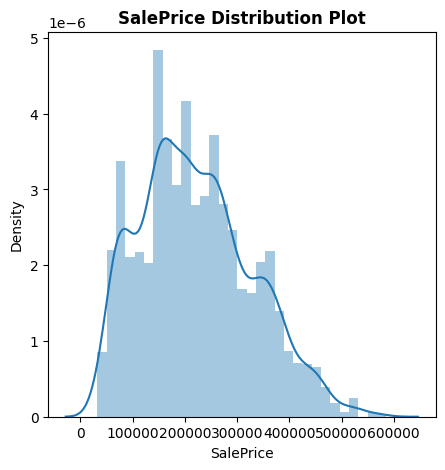

In [8]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(5, 5))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Distribution Plot',weight='bold')
plt.show()

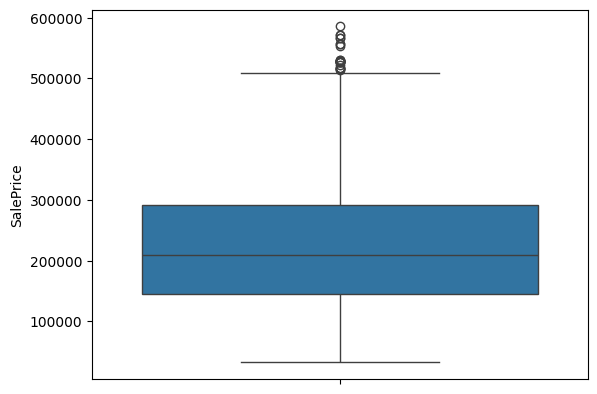

In [9]:
# Checking outliers on the target
sns.boxplot(df['SalePrice'])
plt.show()

In [10]:
stat, p_value = shapiro(df['SalePrice'])
print('Statistic:', stat)
print('p-value:', p_value)

if p_value > 0.05:
    print('Data Target is Normal')
else:
    print('Data Target is not Normal')

Statistic: 0.9755796790122986
p-value: 5.1452962586462643e-26
Data Target is not Normal


- Based on shapiro calculation and the graph, we can see that the target feature, sale price is not normal.
- Additionaly, there'are outliers in the target that we need to handle in data preprocessing stage

## 4.2 Distribution Numerical Features

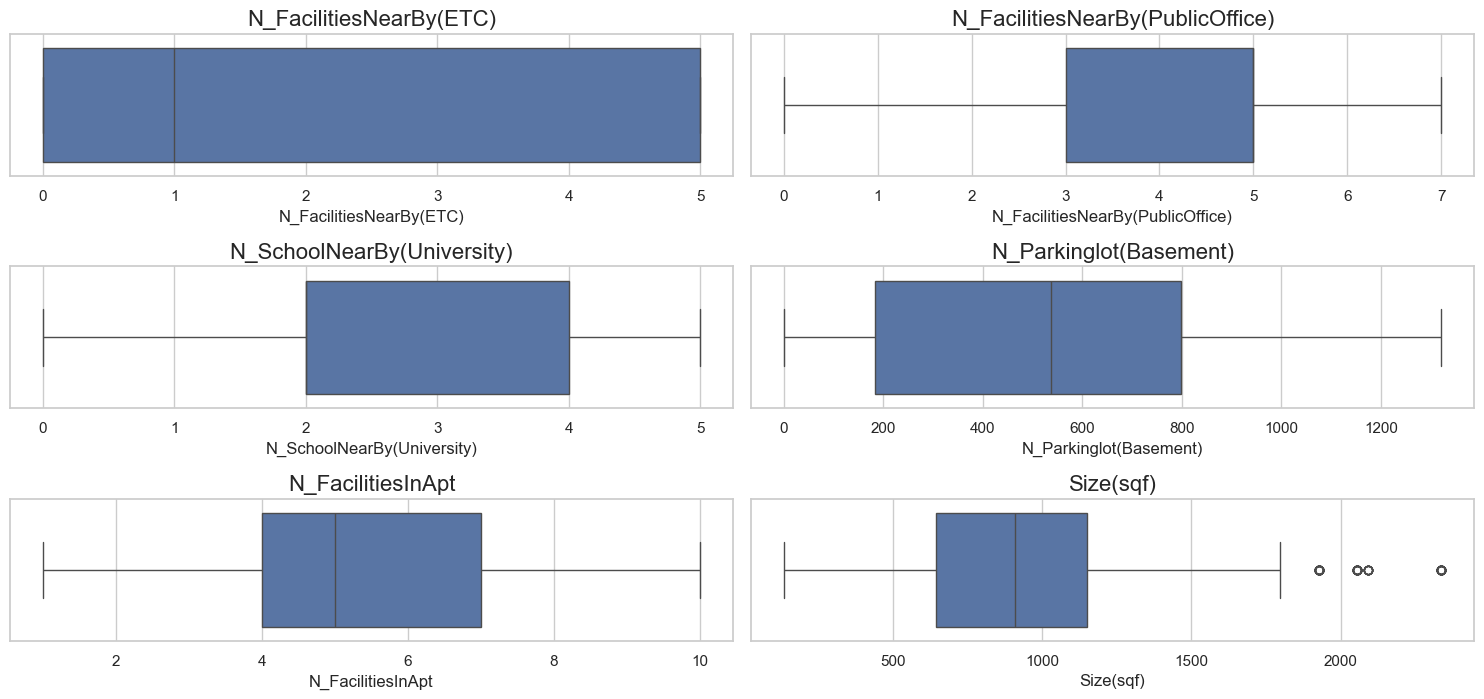

In [11]:
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)']
# Plot distribution 
plt.figure(figsize=(15, 9))
sns.set(style='whitegrid')
plotnumber = 1
    
for feature in  numeric_features:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

In [12]:
# define alpha value
alpha = 0.05
index = 1

dist_info = []
for col in numeric_features:
    stat, p_value = shapiro(df[col].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = df[col].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([col, stat, p_value, distribution, skewness, skewness_type])

# make dataframe from the results
distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "Shapiro Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,Shapiro Statistic,P-value,Distribution,Skewness,Skewness Type
0,N_FacilitiesNearBy(ETC),0.715673,0.000000e+00,Not Normally Distributed,0.568429,Right Skew
1,N_FacilitiesNearBy(PublicOffice),0.933315,1.576985e-39,Not Normally Distributed,-0.173557,Left Skew
2,N_SchoolNearBy(University),0.878251,0.000000e+00,Not Normally Distributed,0.268935,Right Skew
3,N_Parkinglot(Basement),0.921490,5.273086e-42,Not Normally Distributed,0.262595,Right Skew
4,N_FacilitiesInApt,0.905040,5.605194e-45,Not Normally Distributed,0.452692,Right Skew
5,Size(sqf),0.925425,3.237840e-41,Not Normally Distributed,0.875841,Right Skew


The boxplot diagram and statistics calculation indicates that the numerical data in the dataframe don't have normal distribution. Additionally, some columns have outliers. So that, we need to handle it on data preprocessing

## 4.3 Distribution Categorical Feature

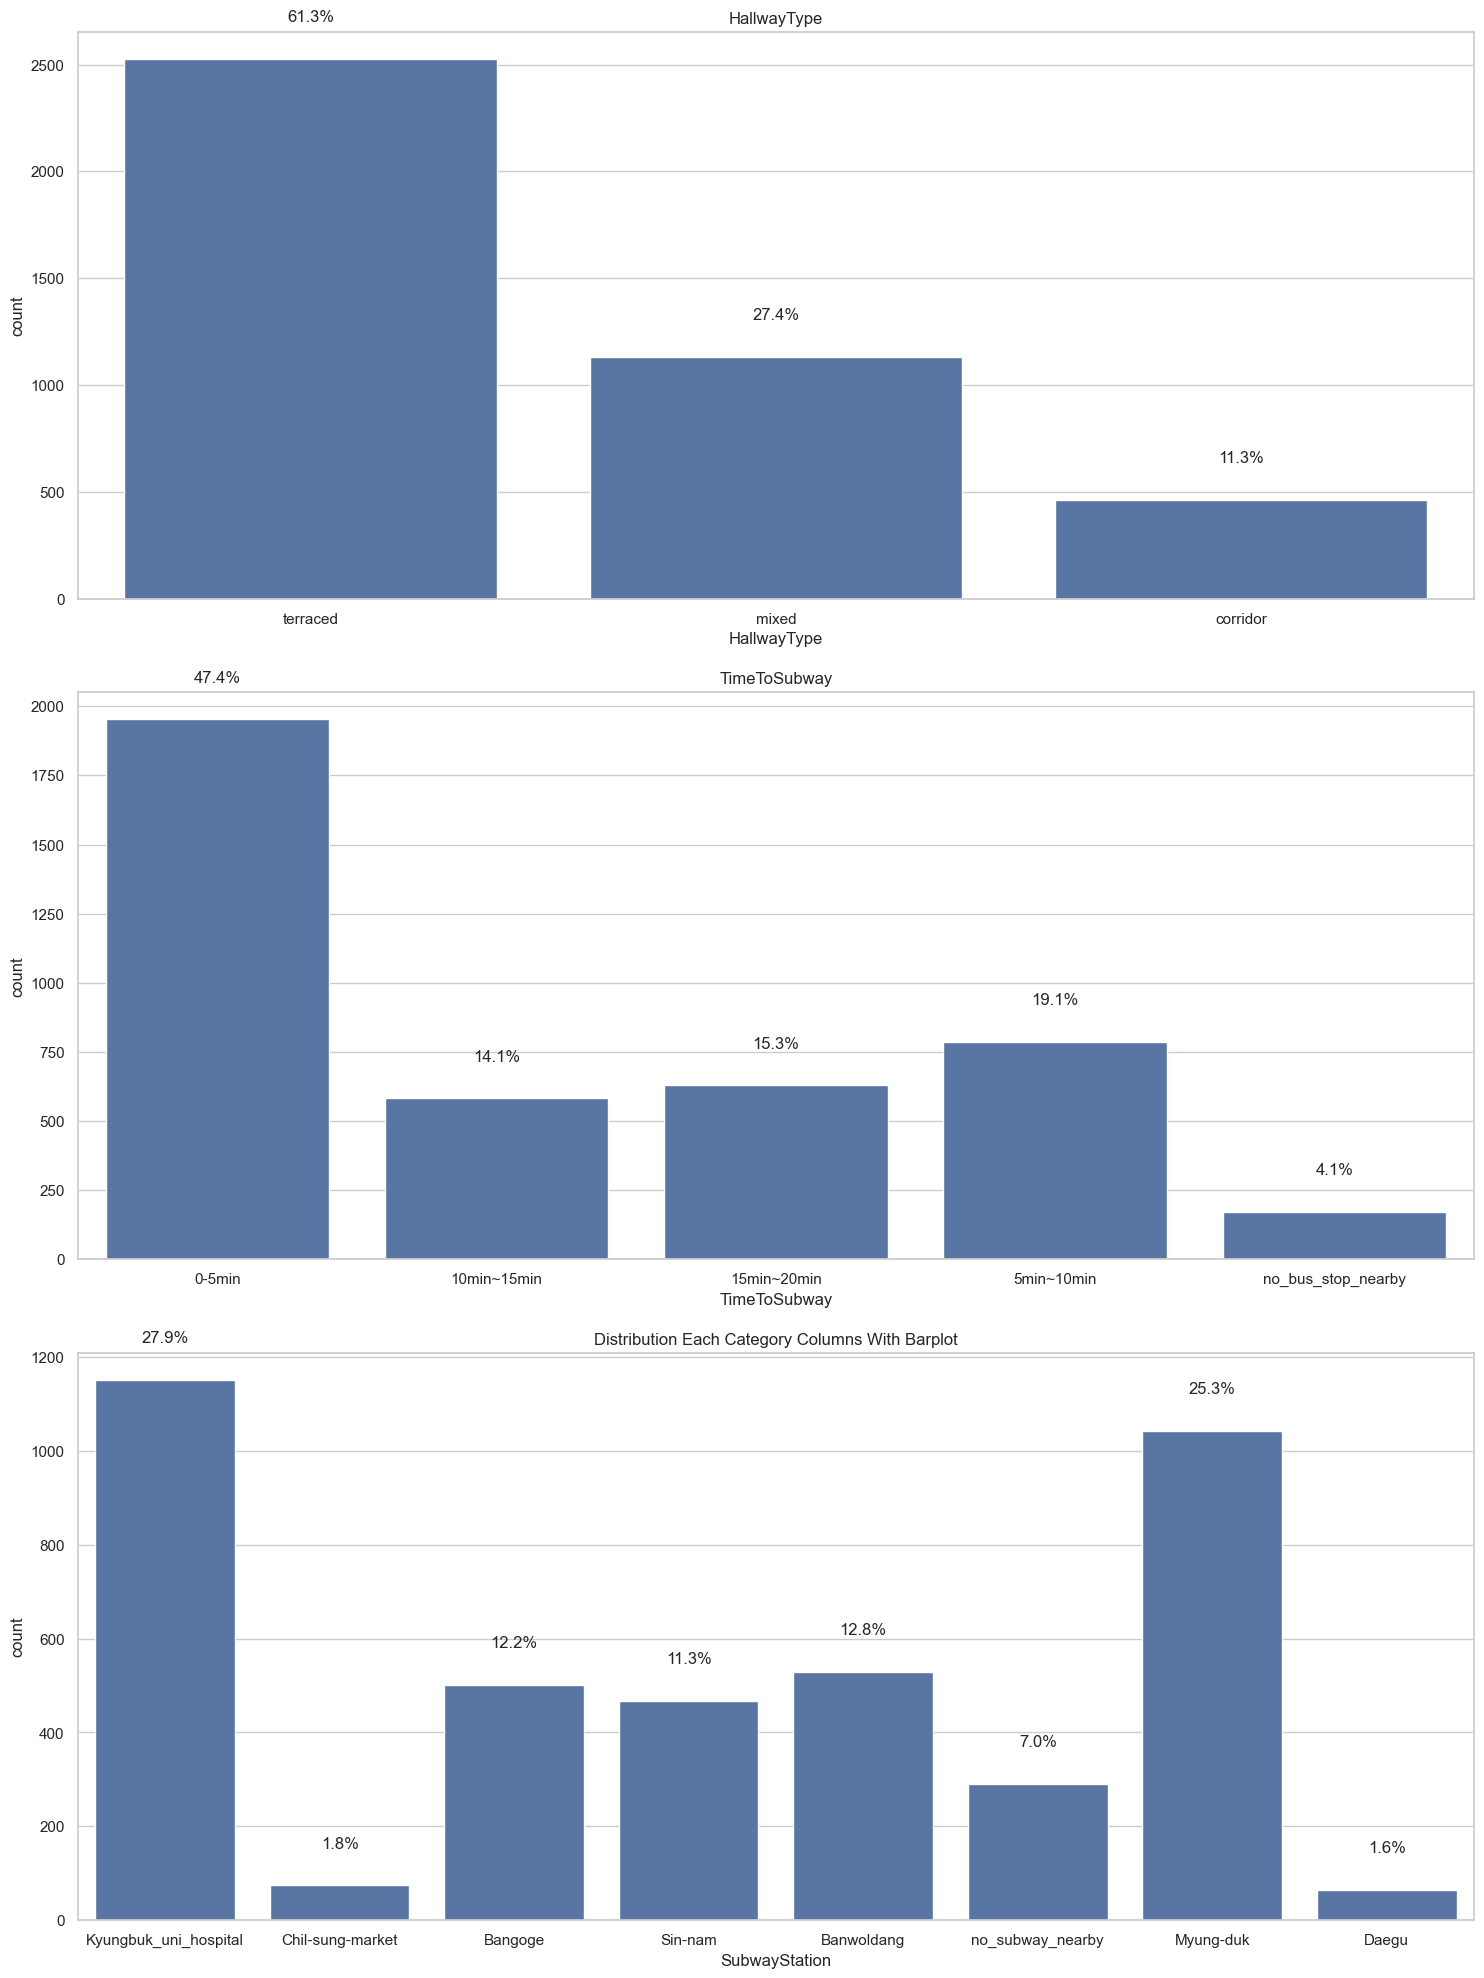

In [13]:
# Show Distribution Category Columns With Barplot
fig, axes = plt.subplots(len(df.select_dtypes(include=['object']).columns), 1, figsize=(15,20))

for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    # Barplot
    ax = sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)

    # Calculate the total df points for percentage calculation
    total = len(df[column])
    for p in ax.patches:
        # Calculate percentage
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        # Display the percentage on top of each bar
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 30), 
                     textcoords = 'offset points')

plt.title('Distribution Each Category Columns With Barplot')
plt.tight_layout()
plt.show()

- Most apartment in Daegu gas terraced hallway type
- Most apartment in Daegu is build near to subway
- Most apartment in Daegu close to Kyungbuk Uni Hospital Subway Station

## 4.3 Check Correlation

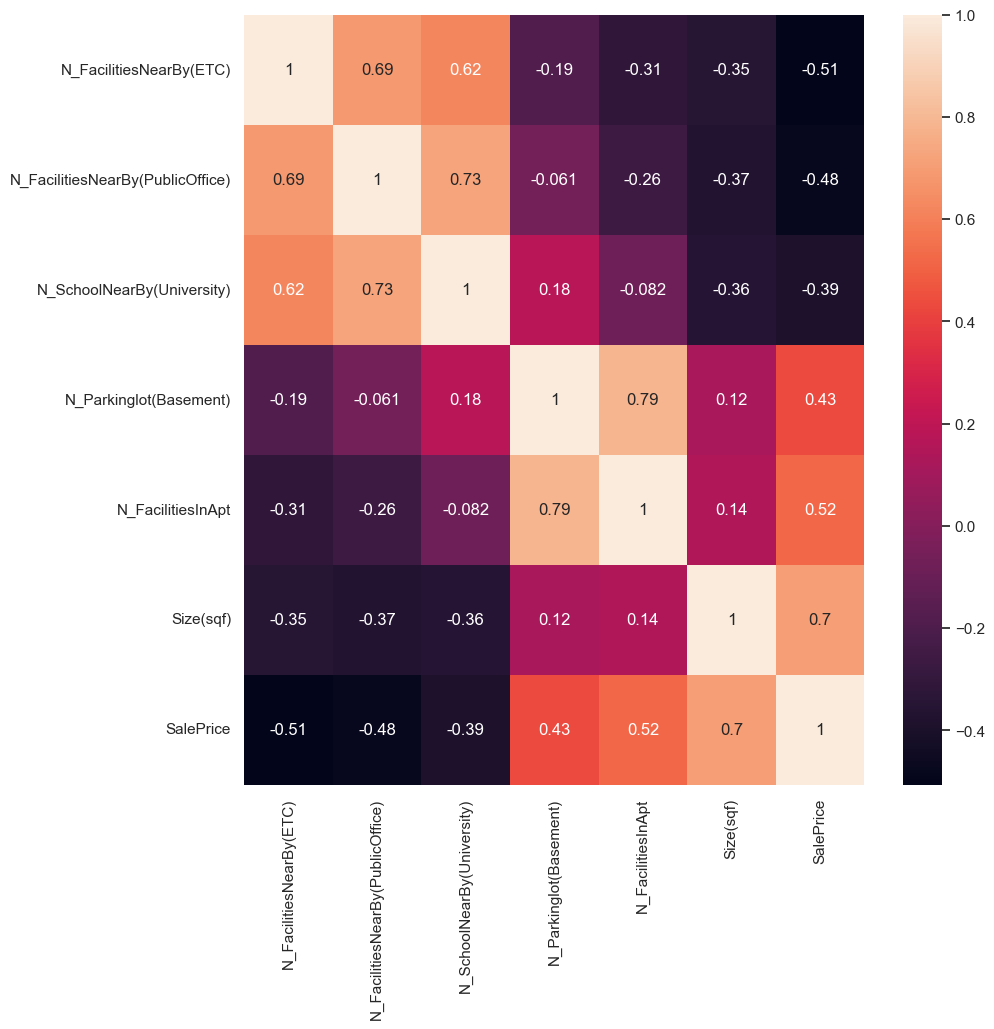

In [14]:
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_features].corr('spearman'), annot=True)
plt.show()

The heatmap indicates a significant positive correlation between the following variables:
- `'University'` with `'PublicOffice'` 
- `'Facilites Apart'` with `'Basement'`
- `'SalePrice'` with `'Size'`

## 4.3 Detect Anomaly

- during the analysis, i found there're an anomaly for about 119 in `TimeToSubway` equal to 5min~10min eventhough value in column `SubwayStation` state no_subway_nearby. So we need to handle it in data preprocessing

In [15]:
# show anomalies data
anomalies = (df['TimeToSubway']=='5min~10min') & (df['SubwayStation']=='no_subway_nearby')
df[anomalies]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
37,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,156,57522
39,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,391150
44,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,411504
83,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,56637
165,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3818,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
3836,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,252212
3841,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,394690
3886,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,269911


## 4.4 Analize Outliers

In [16]:
# # Calculate IQR for SalePrice
# Q1_saleprice = df['SalePrice'].quantile(0.25)
# Q3_saleprice = df['SalePrice'].quantile(0.75)
# IQR_saleprice = Q3_saleprice - Q1_saleprice

# # Identify outliers in SalePrice
# outliers_saleprice = df[((df['SalePrice'] < (Q1_saleprice - 1.5 * IQR_saleprice)) | 
#                                 (df['SalePrice'] > (Q3_saleprice + 1.5 * IQR_saleprice)))]

# # Calculate IQR for Size
# Q1_size = df['Size(sqf)'].quantile(0.25)
# Q3_size = df['Size(sqf)'].quantile(0.75)
# IQR_size = Q3_size - Q1_size

# # Identify outliers in Size
# outliers_size = df[(df['Size(sqf)'] < (Q1_size - 1.5 * IQR_size)) | 
#                            (df['Size(sqf)'] > (Q3_size + 1.5 * IQR_size))]

# # Combine outliers
# outliers_combined = pd.concat([outliers_saleprice, outliers_size]).drop_duplicates()


### 4.4.1 Outliers in SalePrice

In [17]:
# numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)','SalePrice']
# # Plot distribution 
# plt.figure(figsize=(15, 9))
# sns.set(style='whitegrid')
# plotnumber = 1
    
# for feature in  numeric_features:
#     ax = plt.subplot(4,2, plotnumber)
#     sns.boxplot(x=feature, data=outliers_saleprice)
#     plt.title(feature, fontsize=16)
#     plt.tight_layout()
#     plotnumber += 1


In [18]:
# outliers_saleprice.describe()

### 4.4.2 Outleirs in Size

In [19]:
# plt.figure(figsize=(15, 9))
# sns.set(style='whitegrid')
# plotnumber = 1
    
# for feature in  numeric_features:
#     ax = plt.subplot(4,2, plotnumber)
#     sns.boxplot(x=feature, data=outliers_size)
#     plt.title(feature, fontsize=16)
#     plt.tight_layout()
#     plotnumber += 1

Based on the Boxplot, seem like the outliers is genuine, means that the number of SalePrice is still make sense. This might be a luxury penthouse

# 5. Data Preprocessing

In [65]:
categorical_features = ['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt']
numeric_features= ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)','SalePrice']

## 5.1 Data Cleaning

### 5.1.1 Change Data Type

In [66]:
# Change data type from float to integer
df['N_FacilitiesNearBy(ETC)'] = df['N_FacilitiesNearBy(ETC)'].astype('int64')
df['N_FacilitiesNearBy(PublicOffice)'] = df['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df['N_SchoolNearBy(University)'] = df['N_SchoolNearBy(University)'].astype('int64')
df['N_Parkinglot(Basement)'] = df['N_Parkinglot(Basement)'].astype('int64')

### 5.1.2 Handling Typo

In [67]:
# rename category in 'TimeToSubway'
df.loc[df['TimeToSubway'] == '0-5min', 'TimeToSubway']='0~5min'
df.loc[df['TimeToSubway'] == 'no_bus_stop_nearby', 'TimeToSubway']='no_subway_nearby'

### 5.1.3 Handling Anomaly

In [68]:
# # make df only contains value besides the anomalies data
# df = df[~anomalies]
# df.shape

In [69]:
df.loc[(df['TimeToSubway'] == '5min~10min') & (df['SubwayStation'] == 'no_subway_nearby'), 'TimeToSubway'] = 'no_subway_nearby'


### 5.1.4 Handling Missing Values

Since there's no missing value, we can skip this step

### 5.1.5 Handling Duplicate

In [70]:
df.duplicated().sum()

1422

- Upon checking for duplicates, I found that there are 1422 duplicate rows. Since there is no unique identifier or primary key in the dataset, and considering that duplication is possible in real-world scenarios (e.g., identical apartments units), I decided to retain the duplicate rows. This helps to keep the dataset representative of the actual market conditions.

### 5.1.6 Handling Outliers

In [71]:
# Calculate IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers

df_cleaned = df[~outliers]

# Validate removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (4123, 11)
Cleaned dataset shape: (4015, 11)


I identified and removed outliers from the dataset, reducing the dataset size from 4004 to 3909. This helps in improving the model performance by reducing noise and potential biases caused by extreme values.

## 5.2 Data Transformation (ColumnTransformer)

We applied transformations including OneHotEncoding for categorical features and StandardScaling for numerical features. Polynomial features were also considered for linear models to capture non-linear relationships.

In [72]:
categorical_features = ['TimeToSubway','HallwayType', 'SubwayStation', 'YearBuilt']
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_Parkinglot(Basement)','N_SchoolNearBy(University)', 'N_FacilitiesInApt', 'Size(sqf)']

# Define the column transformer with one-hot encoding for tree based model
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
        remainder='passthrough')

# Define the column transformer with polynomial feature, one-hot, standard scaler and k-bin
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # drop first
        ('poly', Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                           ('scale', StandardScaler())]), numeric_features) 
    ],
    remainder='passthrough')


# 6. Modeling

We benchmarked several models including 
- Lasso, Ridge, 
- Random Forest (RF), 
- Extreme Gradient Boosting (XGB), 
- Decision Tree (DT)
- Extra Tree (ET) 
- Stacking Regressor. 
- OLS regression with selected columns to avoid multicollinearity.

**Evaluation Metrics:**

The primary evaluation metrics used were **Root Mean Square Error (RMSE)** and **Adjusted R-squared (Adjusted R²)**. 

In [73]:
# Split the data
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


## 6.1 Model Benchmarking

### 6.1.1 Modeling Lasso, Ridge, RF, XGB, ET, DT

We will use pipeline to avoid data leakage. This also help in maintain the model

In [74]:
# Define pipelines for different models
pipelines = {
    'Lasso': Pipeline(steps=[
        ('preprocessor', preprocessor_linear), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', Lasso(random_state=5))]),

    'Ridge': Pipeline(steps=[
        ('preprocessor', preprocessor_linear), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', Ridge(random_state=5))]),

    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', RandomForestRegressor(random_state=5))]),

    'Extreme Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', XGBRegressor(random_state=5))]),

    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', DecisionTreeRegressor(random_state=5))]),

    'Extra Tree': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', ExtraTreesRegressor(random_state=5))])

}


In [75]:
# Dictionary to store results
results = []

# Train and evaluate each model
for name, pipeline in pipelines.items():
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on training set
    y_train_pred = pipeline.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    # Predict on test set
    y_test_pred = pipeline.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calculate difference
    difference = rmse_test - rmse_train

    # Store the results
    results.append({
        'Name': name,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'Difference': difference
    })

In [76]:
pd.DataFrame(results).sort_values(by='RMSE Test', ascending=True)

,Name,RMSE Train,RMSE Test,Difference
2,Random Forest,41507.715511,41693.168685,185.453174
3,Extreme Gradient Boosting,41397.744067,41795.898826,398.154758
5,Extra Tree,41397.742935,41823.283383,425.540448
4,Decision Tree,41397.742935,41827.258233,429.515298
0,Lasso,53296.783053,54062.456505,765.673452
1,Ridge,53296.913601,54069.607304,772.693703


### 6.1.2 Model Stacking

This model stacking include 

**BASE MODELS**

- **Linear Regression, Ridge, Lasso**: These models capture different aspects of linear relationships and regularization, which helps in dealing with multicollinearity and feature selection.
- **Random Forest**: This model captures non-linear relationships and interactions between features.

**META-MODEL**
- **Linear Regression:** It provides a simple, interpretable way to combine the predictions of the base models. This helps avoid overfitting and ensures that the final model remains easy to understand.



In [77]:
# Make predictions using the base models for data train 
base_model1 = Pipeline([('preprocessor', preprocessor_linear),('regressor', LinearRegression())])
base_model2 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', Ridge(random_state=0))])
base_model3 =  Pipeline([('preprocessor', preprocessor_linear), ('regressor', Lasso(random_state=0))])
base_model4 =  Pipeline([('preprocessor', preprocessor_tree), ('regressor', RandomForestRegressor(random_state=0))])

# Train the base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)
base_model3.fit(X_train, y_train)
base_model4.fit(X_train, y_train)

# Make prediction using the base model for X_train
pred1_train = base_model1.predict(X_train)
pred2_train = base_model2.predict(X_train)
pred3_train = base_model3.predict(X_train)
pred4_train = base_model4.predict(X_train)

# Create a meta-dataset using base model predictions
meta_X_train = np.column_stack((pred1_train, pred2_train, pred3_train, pred4_train))

meta_model = LinearRegression()
meta_model.fit(meta_X_train, y_train)

# Make final predictions using the stacked model
stacked_pred_initial_train = meta_model.predict(meta_X_train)

# Calculate MAE for the stacked model
stacked_mae_initial_train = mean_absolute_error(y_train, stacked_pred_initial_train)

# Calculate MSE for the stacked model
stacked_mse_initial_train = mean_squared_error(y_train, stacked_pred_initial_train)

# Calculate RMSE for the stacked model
stacked_rmse_initial_train = np.sqrt(mean_squared_error(y_train, stacked_pred_initial_train))

# Calculate MAPE for the stacked model
stacked_mape_initial_train = np.mean(np.abs((y_train - stacked_pred_initial_train) / y_train)) * 100

# Calculate RMSPE for the stacked model
stacked_rmspe_initial_train = np.sqrt(np.mean(np.square((y_train - stacked_pred_initial_train) / y_train))) * 100

# Calculate r2 for the stacked model
r2_test_initial_stacking_train = r2_score(y_train, stacked_pred_initial_train)

# Calculate Adjusted R2
adjusted_r2_initial_stacking_train = 1 - (1 - r2_test_initial_stacking_train) * (len(y_train) - 1) / (len(y_train) - meta_X_train.shape[1] - 1)

# Print evaluation metrics
print(f"Stacked Model MAE: {stacked_mae_initial_train}")
print(f"Stacked Model MSE: {stacked_mse_initial_train}")
print(f"Stacked Model RMSE: {stacked_rmse_initial_train}")
print(f"Stacked Model MAPE: {stacked_mape_initial_train}")
print(f"Stacked Model RMSPE: {stacked_rmspe_initial_train}")
print(f"Adjusted R^2 Initial: {adjusted_r2_initial_stacking_train}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+12, tolerance: 3.395e+09
  model = cd_fast.enet_coordinate_descent(


Stacked Model MAE: 32288.909622021623
Stacked Model MSE: 1671306341.4751828
Stacked Model RMSE: 40881.613733745675
Stacked Model MAPE: 17.703913408210468
Stacked Model RMSPE: 22.68492327653294
Adjusted R^2 Initial: 0.8416876837303068


In [78]:
# Make predictions using the base models for data test
pred1_test = base_model1.predict(X_test)
pred2_test = base_model2.predict(X_test)
pred3_test = base_model3.predict(X_test)
pred4_test = base_model4.predict(X_test)

# Calculate RMSE for each base model
rmse_base_model1 = np.sqrt(mean_squared_error(y_test, pred1_test))
rmse_base_model2 = np.sqrt(mean_squared_error(y_test, pred2_test))
rmse_base_model3 = np.sqrt(mean_squared_error(y_test, pred3_test))
rmse_base_model4 = np.sqrt(mean_squared_error(y_test, pred4_test))

# Calculate RMSPE for each base model
rmspe_base_model1 = np.sqrt(np.mean(np.square((y_test - pred1_test) / y_test))) * 100
rmspe_base_model2 = np.sqrt(np.mean(np.square((y_test - pred2_test) / y_test))) * 100
rmspe_base_model3 = np.sqrt(np.mean(np.square((y_test - pred3_test) / y_test))) * 100
rmspe_base_model4 = np.sqrt(np.mean(np.square((y_test - pred4_test) / y_test))) * 100

# Create a meta-dataset using base model predictions
meta_X_test = np.column_stack((pred1_test, pred2_test, pred3_test, pred4_test))

# Fit the meta model on the test set predictions
meta_model.fit(meta_X_test, y_test)

# Make final predictions using the stacked model
stacked_pred_initial_test = meta_model.predict(meta_X_test)

# Calculate RMSE for the stacked model
stacked_rmse_initial_test = np.sqrt(mean_squared_error(y_test, stacked_pred_initial_test))

# Calculate RMSPE for the stacked model
stacked_rmspe_initial_test = np.sqrt(np.mean(np.square((y_test - stacked_pred_initial_test) / y_test))) * 100

# Calculate r2 for the stacked model
r2_test_initial_test_stacking = r2_score(y_test, stacked_pred_initial_test)

# Calculate Adjusted R2
adjusted_r2_initial_test_stacking = 1 - (1 - r2_test_initial_test_stacking) * (len(y_test) - 1) / (len(y_test) - meta_X_test.shape[1] - 1)

# Print RMSE and RMSPE results for base models
print(f"Base Model 1 RMSE: {rmse_base_model1}")
print(f"Base Model 1 RMSPE: {rmspe_base_model1}")
print(f"Base Model 2 RMSE: {rmse_base_model2}")
print(f"Base Model 2 RMSPE: {rmspe_base_model2}")
print(f"Base Model 3 RMSE: {rmse_base_model3}")
print(f"Base Model 3 RMSPE: {rmspe_base_model3}")
print(f"Base Model 4 RMSE: {rmse_base_model4}")
print(f"Base Model 4 RMSPE: {rmspe_base_model4}")

# Print RMSE, RMSPE, and Adjusted R2 for the stacked model
print(f"Stacked Model RMSE: {stacked_rmse_initial_test}")
print(f"Stacked Model RMSPE: {stacked_rmspe_initial_test}")
print(f"Adjusted R^2 Initial_test: {adjusted_r2_initial_test_stacking}")


Base Model 1 RMSE: 42579.48707691885
Base Model 1 RMSPE: 23.74210203893085
Base Model 2 RMSE: 42545.765654446484
Base Model 2 RMSPE: 23.641331626574107
Base Model 3 RMSE: 42497.1337536011
Base Model 3 RMSPE: 23.60314891626098
Base Model 4 RMSE: 41686.05090003503
Base Model 4 RMSPE: 23.407338366821094
Stacked Model RMSE: 41205.447534776205
Stacked Model RMSPE: 22.800072141782028
Adjusted R^2 Initial_test: 0.8430545588444152


In [79]:
results.append({
        'Name': 'Stacking Regressor',
        'RMSE Train': stacked_rmse_initial_train,
        'RMSE Test': stacked_rmse_initial_test,
        'Difference': stacked_rmse_initial_train-stacked_rmse_initial_test
    })

### 6.1.3 Model OLS (Linear Regression)

In [80]:
df_OLS = df_cleaned.copy()

In [81]:
scaler = StandardScaler()

df_dummy = pd.get_dummies(df_OLS, drop_first = True, columns = categorical_features)*1
df_dummy[numeric_features] = scaler.fit_transform(df_dummy[numeric_features])

In [82]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns 
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [83]:
features = [ 'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_FacilitiesInApt', 
    'Size(sqf)', 
    'HallwayType_terraced',
    'TimeToSubway_15min~20min',
    'SubwayStation_Banwoldang',
    'SubwayStation_Daegu',
    'SubwayStation_no_subway_nearby',
    'YearBuilt_1980',
    'YearBuilt_1985',
    'YearBuilt_2008',
    'YearBuilt_2014']


In [84]:
calc_vif(df_dummy[features])

,variables,VIF
0,N_FacilitiesNearBy(ETC),2.299004
1,N_FacilitiesNearBy(PublicOffice),2.584662
2,N_FacilitiesInApt,1.543051
3,Size(sqf),1.535585
4,HallwayType_terraced,2.106184
5,TimeToSubway_15min~20min,1.405937
6,SubwayStation_Banwoldang,1.813034
7,SubwayStation_Daegu,4.716866
8,SubwayStation_no_subway_nearby,1.457563
9,YearBuilt_1980,1.012285


In [85]:
target = 'SalePrice' 
X_ols = df_dummy[features]
y_ols = df_dummy[target]

# Split the data into training and testing sets
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y_ols,test_size=0.2, random_state=42)


sm_lm = sm.OLS(y_train_ols, sm.add_constant(X_train_ols))
result = sm_lm.fit()

In [86]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     802.8
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:44:10   Log-Likelihood:                -39297.
No. Observations:                3212   AIC:                         7.862e+04
Df Residuals:                    3198   BIC:                         7.871e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [87]:
# Predict on the training set
y_train_pred_ols = result.predict(sm.add_constant(X_train_ols))
rmse_train_ols = np.sqrt(mean_squared_error(y_train_ols, y_train_pred_ols))

# Predict on the test set
y_test_pred_ols = result.predict(sm.add_constant(X_test_ols))
rmse_test_ols = np.sqrt(mean_squared_error(y_test_ols, y_test_pred_ols))

# Calculate the difference
difference_ols = rmse_test_ols - rmse_train_ols

# Append results
results.append({
    'Name': 'OLS',
    'RMSE Train': rmse_train_ols,
    'RMSE Test': rmse_test_ols,
    'Difference': difference_ols
})

#### Checking Assumption

In [88]:
# plt.figure(figsize=(10,10))
# sns.set_context('notebook',font_scale=2)
# sns.distplot(result.resid)
# plt.xlabel('Residuals', fontsize = 20)

In [89]:
# sm.qqplot(result.resid, line = '45')
# plt.show()

In [90]:
# plt.figure(figsize=(10,10))
# sns.set_context('notebook',font_scale=2)
# sns.scatterplot(x=result.fittedvalues,y=result.resid)
# sns.lineplot(x=result.fittedvalues,y=0)
# plt.xlabel('Fitted Values', fontsize = 20)
# plt.ylabel('Residuals', fontsize = 20)

### 6.1.4 Comparing Each Model

In [91]:
# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='RMSE Test', ascending=True)
results_df

,Name,RMSE Train,RMSE Test,Difference
6,Stacking Regressor,40881.613734,41205.447535,-323.833801
2,Random Forest,41507.715511,41693.168685,185.453174
3,Extreme Gradient Boosting,41397.744067,41795.898826,398.154758
5,Extra Tree,41397.742935,41823.283383,425.540448
4,Decision Tree,41397.742935,41827.258233,429.515298
7,OLS,49791.832159,50581.716567,789.884408
0,Lasso,53296.783053,54062.456505,765.673452
1,Ridge,53296.913601,54069.607304,772.693703



Based on the benchmarking results, the Stacking Regressor and Random Forest models were selected for further analysis due to their performance metrics.

1. Stacking Regressor: Achieved the lowest RMSE on the test set, indicating high accuracy in predictions. This model had an RMSE of 41,205 on the test set and the difference is -323.83, it suggests that the model is not overfitting significantly and has a good generalization capability.

2. Random Forest: This model also showed strong performance with an RMSE of 41,507 on the training data and 41,693 on the test data. The difference also is the lowest, means that the model is not overfitting. Random Forest models provide clear insights into feature importance, which is crucial for understanding the driving factors behind the predictions and making the model more interpretable.

## 6.2 Hyperparameter Tuning Best Model

### 6.2.1 Random Forest Hyperparameter Tuning

#### 6.2.1.1 Random Forest Initial

In [92]:
# Create a pipeline with feature selection
rf = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('feature_selection', SelectKBest(f_regression, k=7)),
    ('regressor', RandomForestRegressor(random_state=100))
])

# Fit the model
rf.fit(X_train, y_train)

# Predict on training set
y_train_pred_initial_rf = rf.predict(X_train)

# Calculate metrics on train set
mae_train_initial_rf = mean_absolute_error(y_train, y_train_pred_initial_rf)
mape_train_initial_rf = mean_absolute_percentage_error(y_train, y_train_pred_initial_rf)
rmse_train_initial_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_initial_rf))
rmspe_train_initial_rf = np.sqrt(np.mean(np.square((y_train - y_train_pred_initial_rf) / y_train))) * 100
r2_train_initial_rf = r2_score(y_train, y_train_pred_initial_rf)
adjusted_r2_train_initial_rf = 1 - (1 - r2_train_initial_rf) * (len(y_train) - 1) / (len(y_train) - meta_X_test.shape[1] - 1)



# Predict on test set
y_test_pred_initial_rf = rf.predict(X_test)

# Calculate metrics on test set
mae_test_initial_rf = mean_absolute_error(y_test, y_test_pred_initial_rf)
mape_test_initial_rf = mean_absolute_percentage_error(y_test, y_test_pred_initial_rf)
rmse_test_initial_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_initial_rf))
rmspe_test_initial_rf = np.sqrt(np.mean(np.square((y_test - y_test_pred_initial_rf) / y_test))) * 100
r2_test_initial_rf = r2_score(y_test, y_test_pred_initial_rf)
adjusted_r2_test_initial_rf = 1 - (1 - r2_test_initial_rf) * (len(y_test) - 1) / (len(y_test) - meta_X_test.shape[1] - 1)



# Calculate difference
difference = rmse_test_initial_rf - rmse_train_initial_rf

# Print results
print(f"Random Forest RMSE Train: {rmse_train_initial_rf}")
print(f"Random Forest RMSE Test: {rmse_test_initial_rf}")
print(f"Random Forest RMSPE Train: {rmspe_train_initial_rf}")
print(f"Random Forest RMSPE Test: {rmspe_test_initial_rf}")
print(f"Random Forest Difference: {difference}")



Random Forest RMSE Train: 41504.71100357524
Random Forest RMSE Test: 41726.17429389939
Random Forest RMSPE Train: 25.038891382361484
Random Forest RMSPE Test: 23.407701720467283
Random Forest Difference: 221.46329032415088


#### 6.2.1.2 Random Forest Tuned

In [93]:
# # Define the parameter grid
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [None, 10, 20, 30],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__bootstrap': [True, False]
# }


In [94]:
# # Perform grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# print(f"Best parameters: {best_params}")


After do gridsearch. The Best parameters for Random Forest: 
- 'regressor__bootstrap': False, 
- 'regressor__max_depth': 10, 
- 'regressor__min_samples_leaf': 1, 
- 'regressor__min_samples_split': 10, 
- 'regressor__n_estimators': 200

In [95]:
rf_grid = RandomForestRegressor(
    bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200,random_state=42
)
rf_tuning = Pipeline(steps=[('preprocessor', preprocessor_tree), 
                            ('feature_selection', SelectKBest(f_regression, k=7)),
                            ('regressor', rf_grid),
                            ])

rf_tuning.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['TimeToSubway',
                                                   'HallwayType',
                                                   'SubwayStation',
                                                   'YearBuilt'])])),
                ('feature_selection',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x17cc28fe0>)),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       min_samples_split=10, n_estimators=200,
                                       random_state=42))])

In [96]:
# Predict on training set using best estimator
y_train_pred_tuning_rf = rf_tuning.predict(X_train)

# Calculate evaluation metrics
mae_train_tuning_rf = mean_absolute_error(y_train, y_train_pred_tuning_rf)
mape_train_tuning_rf = mean_absolute_percentage_error(y_train, y_train_pred_tuning_rf)
rmse_train_tuning_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_tuning_rf))
rmspe_train_tuning_rf = np.sqrt(np.mean(np.square((y_train - y_train_pred_tuning_rf) / y_train))) * 100

# Calculate R2 and Adjusted R2
r2_train_tuning_rf = r2_score(y_train, y_train_pred_tuning_rf)
adjusted_r2_train_tuning_rf = 1 - (1 - r2_train_tuning_rf) * (len(y_train) - 1) / (len(y_train) - X_test.shape[1] - 1)

# Print evaluation metrics
print(f'RMSE Train: {rmse_train_tuning_rf}')
print(f'RMSPE Train: {rmspe_train_tuning_rf}')
print(f'Adjusted R-Squared Train: {adjusted_r2_train_tuning_rf}')

RMSE Train: 41459.08081410183
RMSPE Train: 24.89801141297851
Adjusted R-Squared Train: 0.8368784775435112


In [97]:
# Predict on the test set using the best estimator
y_test_pred_tuning_rf = rf_tuning.predict(X_test)

# Calculate evaluation metrics
mae_test_tuning_rf = mean_absolute_error(y_test, y_test_pred_tuning_rf)
mape_test_tuning_rf = mean_absolute_percentage_error(y_test, y_test_pred_tuning_rf)
rmse_test_tuning_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_tuning_rf))
rmspe_test_tuning_rf = np.sqrt(np.mean(np.square((y_test - y_test_pred_tuning_rf) / y_test))) * 100

# Calculate R2 and Adjusted R2
r2_test_tuning_rf = r2_score(y_test, y_test_pred_tuning_rf)
adjusted_r2_test_tuning_rf = 1 - (1 - r2_test_tuning_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print evaluation metrics
print(f'RMSE Test: {rmse_test_tuning_rf}')
print(f'RMSPE Test: {rmspe_test_tuning_rf}')
print(f'Adjusted R-Squared Test: {adjusted_r2_test_tuning_rf}')

RMSE Test: 41765.8790230776
RMSPE Test: 23.469853667911565
Adjusted R-Squared Test: 0.8375347824359567


### 6.2.2 Stacking Model Hyperparameter Tuning

In [98]:
# param_grid = {
#     'lr__regressor__fit_intercept': [True, False],
#     'ridge__regressor__alpha': [0.1, 1.0, 10.0],
#     'lasso__regressor__alpha': [0.1, 1.0, 10.0],
#     'rf__regressor__n_estimators': [100, 200, 300],
#     'rf__regressor__max_depth': [None, 10, 20],
#     'final_estimator__fit_intercept': [True, False],
# }

In [99]:
# # Perform Randomized Search
# random_search = RandomizedSearchCV(estimator=stacking_regressor, param_distributions=param_grid,
#                                    n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)

# # Fit the Randomized Search
# random_search.fit(X_train, y_train)

# # Get the best parameters and the best estimator
# best_params = random_search.best_params_
# best_estimator = random_search.best_estimator_

# print(f"Best parameters: {best_params}")


Best parameters from randomizedsearchcv
- 'ridge__regressor__alpha': 10.0, 
- 'rf__regressor__n_estimators': 300, 
- 'rf__regressor__max_depth': 10, 
- 'lr__regressor__fit_intercept': False, 
- 'lasso__regressor__alpha':0.1, 
- 'final_estimator__fit_intercept': False

In [100]:
# Define the base models with pipelines
base_model1 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', LinearRegression(fit_intercept=False))])
base_model2 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', Ridge(alpha=10,random_state=0))])
base_model3 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', Lasso(alpha=0.1,random_state=0))])
base_model4 = Pipeline([('preprocessor', preprocessor_tree), ('regressor', RandomForestRegressor(n_estimators=300, max_depth=10,random_state=0))])

# Train the base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)
base_model3.fit(X_train, y_train)
base_model4.fit(X_train, y_train)

# Make predictions using the base models for training set
pred1_train = base_model1.predict(X_train)
pred2_train = base_model2.predict(X_train)
pred3_train = base_model3.predict(X_train)
pred4_train = base_model4.predict(X_train)

# Make predictions using the base models for testing set
pred1_test = base_model1.predict(X_test)
pred2_test = base_model2.predict(X_test)
pred3_test = base_model3.predict(X_test)
pred4_test = base_model4.predict(X_test)

# Create a meta-dataset using base model predictions
meta_X_train = np.column_stack((pred1_train, pred2_train, pred3_train, pred4_train))
meta_X_test = np.column_stack((pred1_test, pred2_test, pred3_test, pred4_test))

# Make final predictions using the stacked model for training set
stacked_pred_train = meta_model.predict(meta_X_train)

# Make final predictions using the stacked model for testing set
stacked_pred_test = meta_model.predict(meta_X_test)

# Calculate RMSE for each base model on training data
rmse_train_base_model1 = np.sqrt(mean_squared_error(y_train, pred1_train))
rmse_train_base_model2 = np.sqrt(mean_squared_error(y_train, pred2_train))
rmse_train_base_model3 = np.sqrt(mean_squared_error(y_train, pred3_train))
rmse_train_base_model4 = np.sqrt(mean_squared_error(y_train, pred4_train))

# Calculate RMSE for each base model on testing data
rmse_test_base_model1 = np.sqrt(mean_squared_error(y_test, pred1_test))
rmse_test_base_model2 = np.sqrt(mean_squared_error(y_test, pred2_test))
rmse_test_base_model3 = np.sqrt(mean_squared_error(y_test, pred3_test))
rmse_test_base_model4 = np.sqrt(mean_squared_error(y_test, pred4_test))

# Calculate RMSPE for each base model on training data
rmspe_train_base_model1 = np.sqrt(np.mean(np.square((y_train - pred1_train) / y_train))) * 100
rmspe_train_base_model2 = np.sqrt(np.mean(np.square((y_train - pred2_train) / y_train))) * 100
rmspe_train_base_model3 = np.sqrt(np.mean(np.square((y_train - pred3_train) / y_train))) * 100
rmspe_train_base_model4 = np.sqrt(np.mean(np.square((y_train - pred4_train) / y_train))) * 100

# Calculate RMSPE for each base model on testing data
rmspe_test_base_model1 = np.sqrt(np.mean(np.square((y_test - pred1_test) / y_test))) * 100
rmspe_test_base_model2 = np.sqrt(np.mean(np.square((y_test - pred2_test) / y_test))) * 100
rmspe_test_base_model3 = np.sqrt(np.mean(np.square((y_test - pred3_test) / y_test))) * 100
rmspe_test_base_model4 = np.sqrt(np.mean(np.square((y_test - pred4_test) / y_test))) * 100

# Calculate RMSE for the stacked model on training data
rmse_train_stacking = np.sqrt(mean_squared_error(y_train, stacked_pred_train))

# Calculate RMSE for the stacked model on testing data
rmse_test_stacking = np.sqrt(mean_squared_error(y_test, stacked_pred_test))

# Calculate RMSPE for the stacked model on training data
rmspe_train_stacking = np.sqrt(np.mean(np.square((y_train - stacked_pred_train) / y_train))) * 100

# Calculate RMSPE for the stacked model on testing data
rmspe_test_stacking = np.sqrt(np.mean(np.square((y_test - stacked_pred_test) / y_test))) * 100

# Calculate R2 and Adjusted R2 for the stacked model on testing data
r2_test_stacking = r2_score(y_test, stacked_pred_test)
adjusted_r2_test_stacking = 1 - (1 - r2_test_stacking) * (len(y_test) - 1) / (len(y_test) - meta_X_test.shape[1] - 1)

# # Print RMSE and RMSPE results for base models on training data
# print(f"Base Model 1 RMSE (Train): {rmse_train_base_model1}")
# print(f"Base Model 1 RMSPE (Train): {rmspe_train_base_model1}")
# print(f"Base Model 2 RMSE (Train): {rmse_train_base_model2}")
# print(f"Base Model 2 RMSPE (Train): {rmspe_train_base_model2}")
# print(f"Base Model 3 RMSE (Train): {rmse_train_base_model3}")
# print(f"Base Model 3 RMSPE (Train): {rmspe_train_base_model3}")
# print(f"Base Model 4 RMSE (Train): {rmse_train_base_model4}")
# print(f"Base Model 4 RMSPE (Train): {rmspe_train_base_model4}")

# # Print RMSE and RMSPE results for base models on testing data
# print(f"Base Model 1 RMSE (Test): {rmse_test_base_model1}")
# print(f"Base Model 1 RMSPE (Test): {rmspe_test_base_model1}")
# print(f"Base Model 2 RMSE (Test): {rmse_test_base_model2}")
# print(f"Base Model 2 RMSPE (Test): {rmspe_test_base_model2}")
# print(f"Base Model 3 RMSE (Test): {rmse_test_base_model3}")
# print(f"Base Model 3 RMSPE (Test): {rmspe_test_base_model3}")
# print(f"Base Model 4 RMSE (Test): {rmse_test_base_model4}")
# print(f"Base Model 4 RMSPE (Test): {rmspe_test_base_model4}")

# Print RMSE, RMSPE, and Adjusted R2 results for the stacked model on training and testing data
print(f"Stacked Model RMSE (Train): {rmse_train_stacking}")
print(f"Stacked Model RMSPE (Train): {rmspe_train_stacking}")
print(f"Stacked Model RMSE (Test): {rmse_test_stacking}")
print(f"Stacked Model RMSPE (Test): {rmspe_test_stacking}")
print(f"Adjusted R^2 (Test): {adjusted_r2_test_stacking}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+12, tolerance: 3.395e+09
  model = cd_fast.enet_coordinate_descent(


Stacked Model RMSE (Train): 59754.99514702532
Stacked Model RMSPE (Train): 54.29856954415624
Stacked Model RMSE (Test): 51196.25731641963
Stacked Model RMSPE (Test): 28.455374117402233
Adjusted R^2 (Test): 0.7577209507578033


## 6.3 Compare Best model

In [101]:
# Store the results before and after tuning
results_comparison = [
    {
        'Model': 'Random Forest (Initial)',
        'RMSE Train': rmse_train_initial_rf,
        'RMSE Test': rmse_test_initial_rf,
        'RMSPE Train': rmspe_train_initial_rf,
        'RMSPE Test': rmspe_test_initial_rf,
        'Adj R2 Test': adjusted_r2_test_initial_rf
    },
    {
        'Model': 'Random Forest (Tuned)',
        'RMSE Train': rmse_train_tuning_rf,
        'RMSE Test': rmse_test_tuning_rf,
        'RMSPE Train': rmspe_train_tuning_rf,
        'RMSPE Test': rmspe_test_tuning_rf,
        'Adj R2 Test': adjusted_r2_test_tuning_rf
    },
    {
        'Model': 'Stacking Regressor (Initial)', 
        'RMSE Train': stacked_rmse_initial_train,
        'RMSE Test': stacked_rmse_initial_test,
        'RMSPE Train': stacked_rmspe_initial_train,
        'RMSPE Test': stacked_rmspe_initial_test,
        'Adj R2 Test': adjusted_r2_initial_test_stacking
    },
    {
        'Model': 'Stacking Regressor (Tuned)',
        'RMSE Train': rmse_train_stacking,
        'RMSE Test': rmse_test_stacking,
        'RMSPE Train': rmspe_train_stacking,
        'RMSPE Test': rmspe_test_stacking,
        'Adj R2 Test': adjusted_r2_test_stacking
    }
]

# Create DataFrame
comparison_df_tuning = pd.DataFrame(results_comparison)

# Create difference column for RMSE
comparison_df_tuning['Difference RMSE'] = comparison_df_tuning['RMSE Test'] - comparison_df_tuning['RMSE Train']

# Display DataFrame
comparison_df_tuning.sort_values(by='RMSE Test', ascending=True)


,Model,RMSE Train,RMSE Test,RMSPE Train,RMSPE Test,Adj R2 Test,Difference RMSE
2,Stacking Regressor (Initial),40881.613734,41205.447535,22.684923,22.800072,0.843055,323.833801
0,Random Forest (Initial),41504.711004,41726.174294,25.038891,23.407702,0.839063,221.463290
1,Random Forest (Tuned),41459.080814,41765.879023,24.898011,23.469854,0.837535,306.798209
3,Stacking Regressor (Tuned),59754.995147,51196.257316,54.298570,28.455374,0.757721,-8558.737831


After evaluating the models' performance, **Random Forest Initial** was chosen over Stacking Regressor due to its interpretability and robust performance metrics. Random Forest model provides clear insights into feature significance, aiding in actionable decision-making.

In [102]:
# Create a DataFrame to display the results
metrics = {
    'MAE': [mae_test_initial_rf],
    'MAPE': [mape_test_initial_rf],
    'RMSE': [rmse_test_initial_rf],
    'RMSPE': [rmspe_test_initial_rf],
    'Adjusted R²': [adjusted_r2_test_initial_rf]
}

metrics_df = pd.DataFrame(metrics, index=['Random Forest Tuned'])

# Display the DataFrame
metrics_df

,MAE,MAPE,RMSE,RMSPE,Adjusted R²
Random Forest Tuned,32683.467214,0.178885,41726.174294,23.407702,0.839063


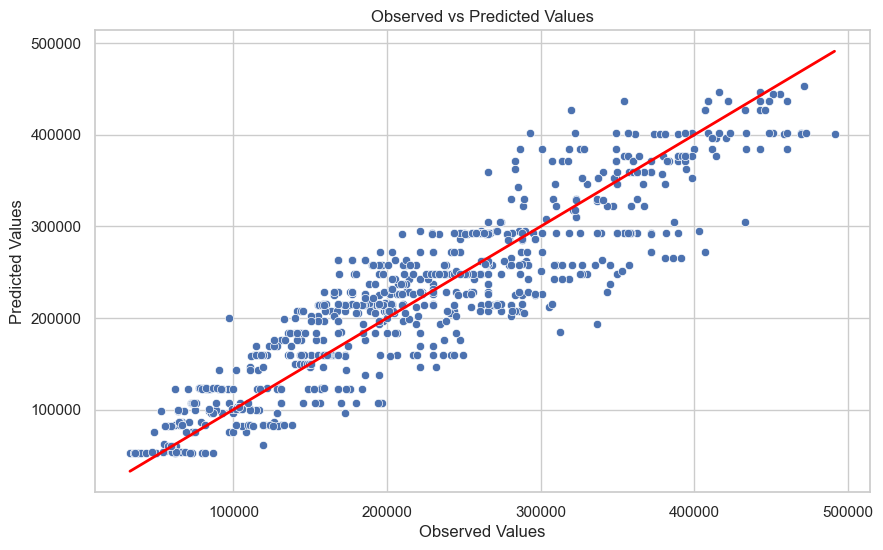

In [110]:
# Plotting the observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_initial_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')
plt.show()


<Axes: >

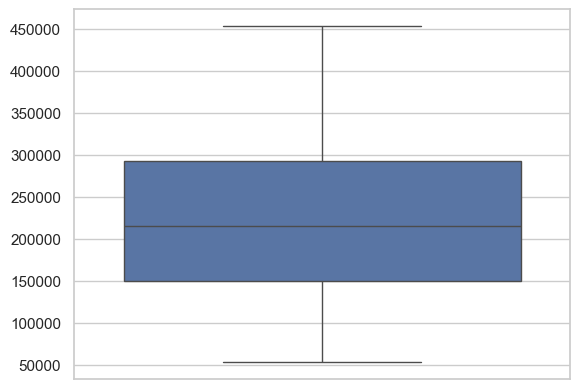

In [104]:
sns.boxplot(y_test_pred_initial_rf)

No outliers on residuals

# 7. Interpretation Model

In [105]:
# Fit the preprocessor separately to get the feature names
preprocessor_tree.fit(X_train)

# Get the feature names after preprocessing
feature_names = preprocessor_tree.get_feature_names_out()

# Get the selected feature indices from the SelectFromModel step
selected_indices = rf.named_steps['feature_selection'].get_support(indices=True)

# Get the names of the selected features
selected_feature_names = feature_names[selected_indices]

# Remove prefixes from the selected feature names
clean_feature_names = [name.split('__')[-1] for name in selected_feature_names]

# Get feature importances from the regressor
feature_importances = rf.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': clean_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importances_df

,Feature,Importance
6,Size(sqf),0.444565
2,HallwayType_terraced,0.359901
4,N_Parkinglot(Basement),0.096910
5,N_FacilitiesInApt,0.065547
0,TimeToSubway_0~5min,0.023355
1,HallwayType_corridor,0.006470
3,YearBuilt_2007,0.003252


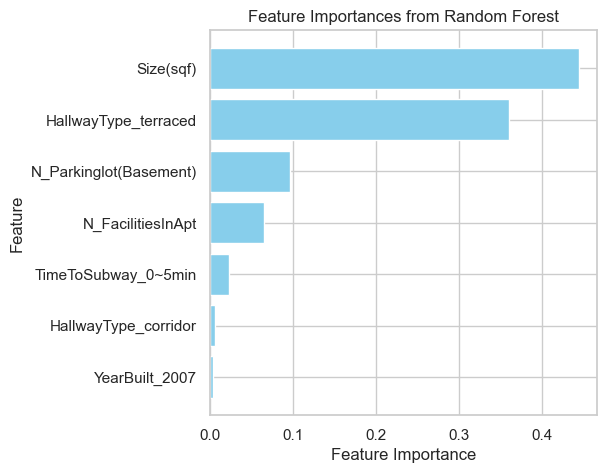

In [106]:
# Plot the feature importances
plt.figure(figsize=(5, 5))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [107]:
df_shap = pd.get_dummies(df_cleaned, drop_first = True, columns = categorical_features)*1
# Split the data
X = df_shap.drop('SalePrice', axis=1)
y = df_shap['SalePrice']
select = SelectKBest(score_func=f_regression, k=7)
X_shap = select.fit_transform(X,y)
# Split the data into training and testing sets
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y,test_size=0.2, random_state=42)


In [108]:
# rf = RandomForestRegressor()
# rf.fit(X_train_shap, y_train_shap)

In [109]:
# # Create a LIME explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train_shap),
#     feature_names=X.columns[select.get_support()],
#     class_names=['SalePrice'],
#     mode='regression'
# )

# # Choose an instance to explain
# i = 80  # Index of the instance to explain
# instance = X_test_shap[i]

# # Explain the prediction of the chosen instance
# exp = explainer.explain_instance(
#     data_row=instance,
#     predict_fn=rf.predict
# )

# # Display the explanation
# exp.show_in_notebook(show_table=True)

